In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
data_file = pd.read_csv(r"../../data/global_GEM/analysis_plant/coal2gas_indicators.csv")
data_file

,GEM_Name,Total_MW_2022,Max_Cap_MW,Max_Cap_Year,Max_Cap_Share_Perc,Perc_El_2021,Country Code,Ret_Tot_MW,Ret_Mean_Lifetime,IND_Perc_Ret_MW,Early_Ret_Tot_MW,IND_Perc_EarlyRet_MW,IND_Perc_Cap22ofPeak,Coal_RetOnly_MW,Coal_Transition_MW,IND_Perc_RetOnly_MW,IND_Perc_Transition_MW,IND_Perc_Transition_vs_Ret,check_overcount
0,Peru,0.0,135.0,2021.0,0.859993,0.859993,PER,135.0,23.000000,100.0,135.0,100.000000,0.0,135.0,0.0,100.000000,0.000000,0.000000,0.0
1,Austria,0.0,1993.0,2000.0,11.255303,0.209111,AUT,1993.0,30.500000,100.0,522.0,26.191671,0.0,1681.0,312.0,84.345208,15.654792,15.654792,0.0
2,Belgium,0.0,2865.0,1999.0,15.027709,0.040392,BEL,2865.0,43.789474,100.0,0.0,0.000000,0.0,2188.0,677.0,76.369983,23.630017,23.630017,0.0
3,Portugal,0.0,2028.0,1999.0,35.258890,1.618123,PRT,2028.0,33.000000,100.0,682.0,33.629191,0.0,1296.0,732.0,63.905325,36.094675,36.094675,0.0
4,Sweden,0.0,291.0,2013.0,0.729264,0.005822,SWE,291.0,44.000000,100.0,0.0,0.000000,0.0,291.0,0.0,100.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Morocco,4257.0,4257.0,2022.0,57.820824,57.820824,MAR,0.0,NaN,0.0,0.0,0.000000,100.0,0.0,0.0,0.000000,0.000000,NaN,0.0
67,Myanmar,190.0,190.0,2022.0,3.980322,3.980322,MMR,0.0,NaN,0.0,0.0,0.000000,100.0,0.0,0.0,0.000000,0.000000,NaN,0.0
68,Namibia,120.0,120.0,2022.0,3.184713,3.184713,NAM,0.0,NaN,0.0,0.0,0.000000,100.0,0.0,0.0,0.000000,0.000000,NaN,0.0
69,North Macedonia,800.0,800.0,2022.0,39.393940,39.393940,MKD,0.0,NaN,0.0,0.0,0.000000,100.0,0.0,0.0,0.000000,0.000000,NaN,0.0


In [4]:
country_names = pd.read_excel(r"../../data/country_names.xlsx")
country_names = country_names[["Country Code","Reform_Name","GEM_Name"]]
power_reform = pd.read_csv(r"../../data/global_UrpelainenYang_reform/power_reform.csv")
power_reform = pd.merge(power_reform,country_names,left_on="cntry",right_on="Reform_Name").dropna()
power_reform = power_reform.set_index("GEM_Name")
power_reform

,cntry,year,R_IndepProducer,R_Private,R_Unbundle,R_WholeSale,R_IndepReg,R_Choice,R_Liberalization,R_Corp,Country Code,Reform_Name
GEM_Name,,,,,,,,,,,,
Yemen,"Yemen, Rep.",2013.0,0,0,0,0,1,0,1,1,YEM,"Yemen, Rep."
Mauritania,Mauritania,2013.0,0,0,0,0,0,0,0,0,MRT,Mauritania
Egypt,"Egypt, Arab Rep.",2013.0,1,0,1,1,1,0,1,0,EGY,"Egypt, Arab Rep."
Azerbaijan,Azerbaijan,2013.0,0,0,0,0,0,0,0,0,AZE,Azerbaijan
Myanmar,Myanmar,2013.0,0,0,0,0,0,0,0,0,MMR,Myanmar
...,...,...,...,...,...,...,...,...,...,...,...,...
Sweden,Sweden,2008.0,1,0,1,1,1,1,1,1,SWE,Sweden
Switzerland,Switzerland,2008.0,1,0,1,0,1,0,1,0,CHE,Switzerland
Türkiye,Turkey,2008.0,1,1,1,1,1,1,1,1,TUR,Turkey


In [120]:
data_file = data_file.sort_values(by="Max_Cap_MW",ascending=False)
#data_file = data_file.sort_values(by="Max_Cap_MW",ascending=False)Max_Cap_Share_Perc
select_data = data_file.head(20)
select_data["p_RetOnly"] = select_data["Max_Cap_Share_Perc"]*select_data["IND_Perc_RetOnly_MW"]/100
select_data["p_Transition"] = select_data["Max_Cap_Share_Perc"]*select_data["IND_Perc_Transition_MW"]/100
select_data["IND_Remain"] = 100-select_data["IND_Perc_Transition_MW"]-select_data["IND_Perc_RetOnly_MW"]
select_data["p_Remain"] =  select_data["Max_Cap_Share_Perc"] - select_data["p_RetOnly"] - select_data["p_Transition"]
select_data = select_data.set_index("GEM_Name")
select_data["R_Choice"] = power_reform["R_Choice"]
select_data["Max_Cap_TW"] = select_data["Max_Cap_MW"]/1000000
select_data["Max_Cap_GW"] = select_data["Max_Cap_MW"]/1000
select_data

C:\Users\jx920\AppData\Local\Temp\ipykernel_65768\2680382177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_data["p_RetOnly"] = select_data["Max_Cap_Share_Perc"]*select_data["IND_Perc_RetOnly_MW"]/100
C:\Users\jx920\AppData\Local\Temp\ipykernel_65768\2680382177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_data["p_Transition"] = select_data["Max_Cap_Share_Perc"]*select_data["IND_Perc_Transition_MW"]/100
C:\Users\jx920\AppData\Local\Temp\ipykernel_65768\2680382177.py:6: SettingWithCo

,Total_MW_2022,Max_Cap_MW,Max_Cap_Year,Max_Cap_Share_Perc,Perc_El_2021,Country Code,Ret_Tot_MW,Ret_Mean_Lifetime,IND_Perc_Ret_MW,Early_Ret_Tot_MW,...,IND_Perc_Transition_MW,IND_Perc_Transition_vs_Ret,check_overcount,p_RetOnly,p_Transition,IND_Remain,p_Remain,R_Choice,Max_Cap_TW,Max_Cap_GW
GEM_Name,,,,,,,,,,,,,,,,,,,,,
China,1098577.50,1098577.50,2022.0,62.931730,62.931730,CHN,120939.35,21.948608,11.008723,83527.85,...,1.141476,10.368834,-1.776357e-15,6.209629,0.718351,88.991277,56.003750,0,1.098577,1098.57750
United States,212041.66,340154.20,2011.0,43.345764,21.624334,USA,148764.92,51.401084,43.734553,5793.10,...,17.554621,40.139019,0.000000e+00,11.347892,7.609185,56.265447,24.388688,1,0.340154,340.15420
India,235848.70,235848.70,2022.0,74.173010,74.173010,IND,15651.10,42.608108,6.636076,2017.50,...,0.209499,3.156967,0.000000e+00,4.766786,0.155392,93.363924,69.250832,0,0.235849,235.84870
Japan,53586.98,53586.98,2022.0,32.510197,32.510197,JPN,2673.90,35.421053,4.989831,468.40,...,1.968762,39.455477,0.000000e+00,0.982156,0.640048,95.010169,30.887993,1,0.053587,53.58698
Germany,40889.80,52867.10,2015.0,44.262809,28.252954,DEU,25301.80,41.584746,47.859255,3693.70,...,13.917162,29.079354,0.000000e+00,15.023724,6.160127,52.140745,23.078959,1,0.052867,52.86710
South Africa,45894.10,46274.10,2021.0,86.348564,86.348564,ZAF,1180.00,60.800000,2.550023,0.00,...,0.388986,15.254237,0.000000e+00,1.866024,0.335884,97.449977,84.146656,0,0.046274,46.27410
Russia,39668.50,43637.50,2015.0,14.821658,17.302496,RUS,10096.00,49.035088,23.136064,457.00,...,14.622744,63.203249,-3.552714e-15,1.261815,2.167333,76.863936,11.392510,0,0.043638,43.63750
Indonesia,40471.60,40471.60,2022.0,61.457830,61.457830,IDN,0.00,NaN,0.000000,0.00,...,0.000000,NaN,0.000000e+00,0.000000,0.000000,100.000000,61.457830,0,0.040472,40.47160
South Korea,39154.00,39154.00,2022.0,35.715010,35.715010,KOR,3420.00,39.363636,8.734740,0.00,...,5.606068,64.181287,0.000000e+00,1.117405,2.002208,91.265260,32.595397,0,0.039154,39.15400


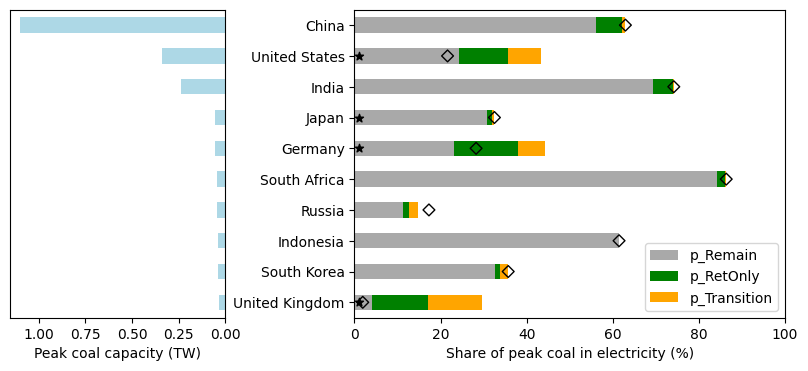

In [7]:
fig, ax = plt.subplots(1,2,figsize=(10,4),gridspec_kw={'width_ratios': [0.5,1]})
plt.subplots_adjust(wspace=0.4)
select_choice = select_data.copy()
select_choice[select_choice["R_Choice"]==0] = -5
select_data[["p_Remain","p_RetOnly","p_Transition"]][::-1].plot.barh(stacked=True, ax=ax[1],color=["darkgray","green","orange"])
ax[1].scatter(select_choice[::-1]["R_Choice"],select_choice[::-1].index,zorder=10,color="black",marker="*")
ax[1].scatter(select_data[::-1]["Perc_El_2021"],select_data[::-1].index,zorder=11,color="None",marker="D",edgecolor="black")
ax[1].set_ylabel(None)
ax[1].set_xlim([0,100])
ax[1].set_xlabel("Share of peak coal in electricity (%)")
select_data[["Max_Cap_TW"]][::-1].plot.barh(stacked=True, ax=ax[0],color=["lightblue"],legend=None)
ax[0].set_xlabel("Peak coal capacity (TW)")
ax[0].invert_xaxis()
ax[0].set_ylabel(None)
ax[0].get_yaxis().set_visible(False)

In [126]:
select_data_1 = select_data.query("R_Choice==1").sort_values(by="IND_Remain",ascending=False).reset_index()
for i in select_data_1.index:
    sum_index = select_data_1.index[:i]
    select_data_1.loc[i,"plot_location"] = select_data_1.loc[sum_index,"Max_Cap_GW"].sum()
    
select_data_0 = select_data.query("R_Choice==0").sort_values(by="IND_Remain",ascending=False).reset_index()
for i in select_data_0.index:
    sum_index = select_data_0.index[:i]
    select_data_0.loc[i,"plot_location"] = select_data_0.loc[sum_index,"Max_Cap_GW"].sum()
select_data_0

,GEM_Name,Total_MW_2022,Max_Cap_MW,Max_Cap_Year,Max_Cap_Share_Perc,Perc_El_2021,Country Code,Ret_Tot_MW,Ret_Mean_Lifetime,IND_Perc_Ret_MW,...,IND_Perc_Transition_vs_Ret,check_overcount,p_RetOnly,p_Transition,IND_Remain,p_Remain,R_Choice,Max_Cap_TW,Max_Cap_GW,plot_location
0,Indonesia,40471.6,40471.6,2022.0,61.457830,61.457830,IDN,0.00,NaN,0.000000,...,NaN,0.000000e+00,0.000000,0.000000,100.000000,61.457830,0,0.040472,40.4716,0.0000
1,Vietnam,24637.0,24637.0,2022.0,46.623360,46.623360,VNM,0.00,NaN,0.000000,...,NaN,0.000000e+00,0.000000,0.000000,100.000000,46.623360,0,0.024637,24.6370,40.4716
2,Malaysia,13280.0,13280.0,2022.0,43.989075,43.989075,MYS,0.00,NaN,0.000000,...,NaN,0.000000e+00,0.000000,0.000000,100.000000,43.989075,0,0.013280,13.2800,65.1086
3,Philippines,11945.0,11945.0,2022.0,45.489834,45.489834,PHL,157.00,34.000000,1.314357,...,0.000000,0.000000e+00,0.597899,0.000000,98.685643,44.891935,0,0.011945,11.9450,78.3886
4,South Africa,45894.1,46274.1,2021.0,86.348564,86.348564,ZAF,1180.00,60.800000,2.550023,...,15.254237,0.000000e+00,1.866024,0.335884,97.449977,84.146656,0,0.046274,46.2741,90.3336
5,India,235848.7,235848.7,2022.0,74.173010,74.173010,IND,15651.10,42.608108,6.636076,...,3.156967,0.000000e+00,4.766786,0.155392,93.363924,69.250832,0,0.235849,235.8487,136.6077
6,South Korea,39154.0,39154.0,2022.0,35.715010,35.715010,KOR,3420.00,39.363636,8.734740,...,64.181287,0.000000e+00,1.117405,2.002208,91.265260,32.595397,0,0.039154,39.1540,372.4564
7,China,1098577.5,1098577.5,2022.0,62.931730,62.931730,CHN,120939.35,21.948608,11.008723,...,10.368834,-1.776357e-15,6.209629,0.718351,88.991277,56.003750,0,1.098577,1098.5775,411.6104
8,Ukraine,22082.0,24218.0,2017.0,30.967491,23.201900,UKR,3821.00,42.285714,15.777521,...,15.702696,0.000000e+00,4.118684,0.767218,84.222479,26.081589,0,0.024218,24.2180,1510.1879
9,Russia,39668.5,43637.5,2015.0,14.821658,17.302496,RUS,10096.00,49.035088,23.136064,...,63.203249,-3.552714e-15,1.261815,2.167333,76.863936,11.392510,0,0.043638,43.6375,1534.4059


C:\Users\jx920\AppData\Local\Temp\ipykernel_65768\3252351448.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0,0].set_ylim([0,1500])
C:\Users\jx920\AppData\Local\Temp\ipykernel_65768\3252351448.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0,1].set_ylim([0,1500])


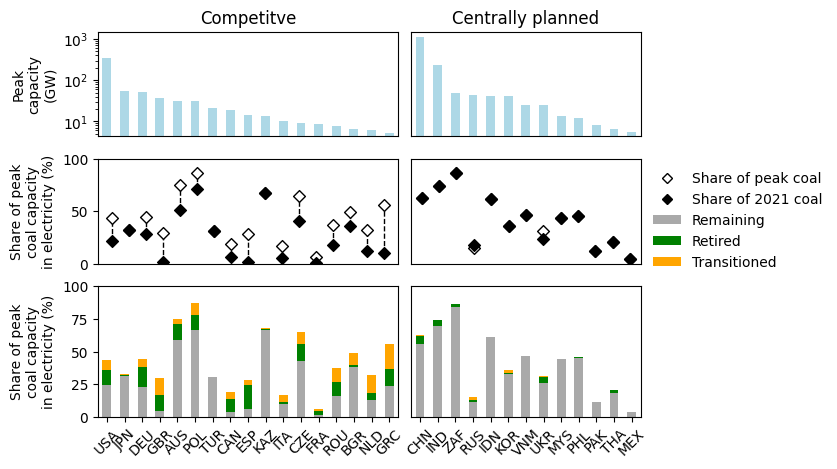

In [39]:
fig, ax = plt.subplots(3,2,figsize=(7,5),gridspec_kw={'width_ratios': [len(select_data_1)/len(select_data_0),1],'height_ratios': [0.8,0.8,1]})
plt.subplots_adjust(wspace=0.05,hspace=0.2)

# top panel peak capacity
select_data_1[["Max_Cap_GW"]].plot.bar(stacked=True, ax=ax[0,0],color=["lightblue"],legend=None)
select_data_0[["Max_Cap_GW"]].plot.bar(stacked=True, ax=ax[0,1],color=["lightblue"],legend=None)
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[0,0].set_ylim([0,1500])
ax[0,1].set_ylim([0,1500])
ax[0,0].set_title("Competitve")
ax[0,1].set_title("Centrally planned")
ax[0,0].get_xaxis().set_visible(False)
ax[0,1].get_xaxis().set_visible(False)
ax[0,0].set_ylabel("Peak\ncapacity\n(GW)")
ax[0,1].get_yaxis().set_visible(False)
# mid panel 
ax[1,0].scatter(select_data_1.index,select_data_1["Perc_El_2021"],zorder=12,color="black",marker="D",edgecolor="black")
ax[1,0].scatter(select_data_1.index,select_data_1["Max_Cap_Share_Perc"],zorder=11,color="white",marker="D",edgecolor="black")
ax[1,0].vlines(select_data_1.index, select_data_1["Perc_El_2021"], select_data_1["Max_Cap_Share_Perc"], 
               ls = '--',color='black', linewidth=1, zorder=10)
ax[1,1].scatter(select_data_0.index,select_data_0["Perc_El_2021"],zorder=12,color="black",marker="D",edgecolor="black")
ax[1,1].scatter(select_data_0.index,select_data_0["Max_Cap_Share_Perc"],zorder=11,color="white",marker="D",edgecolor="black")
ax[1,1].vlines(select_data_0.index, select_data_0["Perc_El_2021"], select_data_0["Max_Cap_Share_Perc"], 
               ls = '--',color='black', linewidth=1, zorder=10)
ax[1,0].set_ylim([0,100])
ax[1,1].set_ylim([0,100])
ax[1,0].set_ylabel("Share of peak\ncoal capacity\nin electricity (%)")
ax[1,0].get_xaxis().set_visible(False)
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].get_yaxis().set_visible(False)
# bottom panel capacity shift
select_data_1[["p_Remain","p_RetOnly","p_Transition"]].plot.bar(stacked=True, ax=ax[2,0],color=["darkgray","green","orange"],legend=None)
select_data_0[["p_Remain","p_RetOnly","p_Transition"]].plot.bar(stacked=True, ax=ax[2,1],color=["darkgray","green","orange"],legend=None)
ax[2,0].set_ylim([0,100])
ax[2,1].set_ylim([0,100])
ax[2,0].set_xlabel(None)
ax[2,1].set_xlabel(None)
ax[2,1].get_yaxis().set_visible(False)

ax[2,0].set_ylabel("Share of peak\ncoal capacity\nin electricity (%)")
ax[2,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45)
ax[2,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)


legend_elements = [Line2D([0], [0], marker='D', color='black', label='Share of peak coal',markerfacecolor='white',ls="None",markersize=5),
                   Line2D([0], [0], marker='D', color='black', label='Share of 2021 coal',markerfacecolor='black', ls="None", markersize=5),
                   Patch(facecolor="darkgray", edgecolor=None, label="Remaining"),
                   Patch(facecolor="green", edgecolor=None, label="Retired"),
                   Patch(facecolor="orange", edgecolor=None, label="Transitioned")]
ax[1,1].legend(handles=legend_elements, bbox_to_anchor=(1, 1),loc='upper left',frameon=False)
#fig.savefig("top20peak_coal_inventory_small.png",dpi=600, bbox_inches='tight')

## Updated data

In [369]:
data_file_recent = pd.read_csv("../temporal_country_models/_all_temporal_coalgas_var.csv")
data_file_recent_select = data_file_recent.query("Year==2021")
select_reform = power_reform.query("year==2013")[["R_Choice","Country Code"]]
data_file_recent_select = pd.merge(data_file_recent_select,power_reform[["Country Code","R_Choice"]],
                                   on = ["Country Code"],how="left")
data_file_recent_select["Coal_Peak_GW"] =  data_file_recent_select["Coal_Peak_MW"]/1000
data_file_recent_select["Gas_Peak_GW"] =  data_file_recent_select["Gas_Peak_MW"]/1000
data_file_recent_select["Coal_Remain"] = 100-data_file_recent_select["Coal_Share_PhasedOut"]
data_file_recent_select["Share_Coal_Gen_100"] = data_file_recent_select["Share_Coal_Gen"]*100
data_file_recent_select["Share_Gas_Gen_100"] = data_file_recent_select["Share_Gas_Gen"]*100
for cntry in data_file_recent["Country Code"].unique():
    this_data = data_file_recent[data_file_recent["Country Code"]==cntry]
    cntry_index = data_file_recent_select[data_file_recent_select["Country Code"]==cntry].index
    data_file_recent_select.loc[cntry_index,"Max_Share_Coal_Gen"] = this_data["Share_Coal_Gen"].max()
    data_file_recent_select.loc[cntry_index,"Max_Share_Gas_Gen"] = this_data["Share_Gas_Gen"].max()
    data_file_recent_select.loc[cntry_index,"Max_Coal_Gen"] = this_data['Electricity from coal (TWh)'].max()
    data_file_recent_select.loc[cntry_index,"Max_Gas_Gen"] = this_data['Electricity from gas (TWh)'].max()
data_file_recent_select["Max_Share_Coal_Gen_100"] = data_file_recent_select["Max_Share_Coal_Gen"]*100
data_file_recent_select["Max_Share_Gas_Gen_100"] = data_file_recent_select["Max_Share_Gas_Gen"]*100
data_file_recent_select["Share_Gas_GenRemain"] = 100-data_file_recent_select["Share_Gas_GenDecline"]
data_file_recent_select["Share_Coal_GenRemain"] = 100-data_file_recent_select["Share_Coal_GenDecline"]
data_file_recent_select

,Country Code,year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,Coal_duration_year,...,Share_Coal_Gen_100,Share_Gas_Gen_100,Max_Share_Coal_Gen,Max_Share_Gas_Gen,Max_Coal_Gen,Max_Gas_Gen,Max_Share_Coal_Gen_100,Max_Share_Gas_Gen_100,Share_Gas_GenRemain,Share_Coal_GenRemain
0,ARG,2021,375.0,2.0,1983.0,375.0,0.0,0.0,0.0,38.0,...,1.895282,60.669485,0.035781,0.647492,2.84,89.76,3.578067,64.749174,100.000000,100.000000
1,AUS,2021,25137.0,130.4,1958.0,31004.0,4031.0,181.0,1636.0,63.0,...,51.319518,17.789201,0.833285,0.212408,174.86,52.48,83.328536,21.240843,100.000000,72.509436
2,BGD,2021,1845.0,7.9,2006.0,1845.0,0.0,0.0,0.0,15.0,...,11.865459,69.939183,0.143142,0.749214,12.20,59.57,14.314209,74.921394,100.000000,100.000000
3,BIH,2021,2073.0,12.0,1966.0,2073.0,0.0,0.0,0.0,55.0,...,58.112773,0.000000,0.747736,0.000000,11.64,0.00,74.773609,0.000000,100.000000,100.000000
4,BWA,2021,732.0,3.6,1986.0,732.0,0.0,0.0,0.0,35.0,...,81.735160,0.000000,1.000000,0.000000,2.50,0.00,100.000000,0.000000,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,ZWE,2021,950.0,5.6,1956.0,950.0,0.0,0.0,0.0,65.0,...,44.458281,0.000000,0.571240,0.000000,4.33,0.00,57.124011,0.000000,100.000000,100.000000
74,AUT,2021,0.0,0.0,1962.0,1993.0,1681.0,522.0,312.0,59.0,...,0.209111,15.862584,0.145367,0.211309,8.44,14.35,14.536686,21.130909,74.006969,1.658768
75,BEL,2021,0.0,0.0,1949.0,2865.0,2188.0,0.0,677.0,72.0,...,0.040392,22.740584,0.243136,0.332077,17.09,30.84,24.313558,33.207710,73.022049,0.234055
76,PRT,2021,0.0,0.0,1964.0,2028.0,1296.0,0.0,732.0,57.0,...,1.618123,31.492718,0.404525,0.369676,15.23,18.89,40.452489,36.967632,100.000000,5.252791


In [321]:
VAR_coal = "Coal_Peak_GW"#"Max_Coal_Gen"
data_file_recent_select = data_file_recent_select.sort_values(by=VAR_coal,ascending=False)
top_data_select = data_file_recent_select.head(20)
select_data_1 = top_data_select.query("R_Choice==1").sort_values(by="Coal_Share_PhasedOut").reset_index()
for i in select_data_1.index:
    sum_index = select_data_1.index[:i]
    select_data_1.loc[i,"plot_location"] = select_data_1.loc[sum_index,VAR_coal].sum()
    
select_data_0 = top_data_select.query("R_Choice==0").sort_values(by="Coal_Share_PhasedOut").reset_index()
for i in select_data_0.index:
    sum_index = select_data_0.index[:i]
    select_data_0.loc[i,"plot_location"] = select_data_0.loc[sum_index,VAR_coal].sum()
select_data_0

,index,Country Code,year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,...,Share_Gas_GenDecline,R_Choice,Coal_Peak_GW,Gas_Peak_GW,Coal_Remain,Share_Coal_Gen_100,Max_Share_Coal_Gen,Max_Coal_Gen,Max_Share_Coal_Gen_100,plot_location
0,11,CHN,2021,1073720.5,4876.3,1953.0,1073720.5,104700.35,57664.1,10429.0,...,0.000000,0.0,1073.7205,105.190,100.000000,62.931723,0.809589,5421.19,80.958940,0.0000
1,24,IND,2021,233142.7,1087.7,1939.0,233142.7,13510.00,1240.0,494.1,...,54.376006,0.0,233.1427,26.102,100.000000,74.173012,0.765965,1363.10,76.596534,1073.7205
2,58,ZAF,2021,46274.1,232.4,1952.0,46274.1,0.00,0.0,0.0,...,0.000000,0.0,46.2741,0.280,100.000000,86.348566,0.949939,231.74,94.993875,1306.8632
3,25,IDN,2021,39271.6,185.8,1984.0,39271.6,0.00,0.0,0.0,...,0.000000,0.0,39.2716,17.257,100.000000,61.404189,0.619800,205.31,61.979988,1353.1373
4,59,KOR,2021,38114.0,163.9,1968.0,38114.0,1225.00,0.0,2195.0,...,0.000000,0.0,38.1140,41.321,100.000000,35.715014,0.461784,240.49,46.178351,1392.4089
5,71,VNM,2021,22717.0,100.5,1975.0,22717.0,0.00,0.0,0.0,...,55.656973,0.0,22.7170,8.146,100.000000,46.623361,0.488875,114.76,48.887521,1430.5229
6,34,MYS,2021,13280.0,58.0,1988.0,13280.0,0.00,0.0,0.0,...,85.793608,0.0,13.2800,17.864,100.000000,43.989071,0.497431,84.22,49.743075,1453.2399
7,50,PHL,2021,10609.0,52.2,1981.0,10609.0,105.00,0.0,0.0,...,0.000000,0.0,10.6090,3.312,100.000000,45.042048,0.463101,52.21,46.310094,1466.5199
8,66,UKR,2021,23372.0,134.8,1953.0,24218.0,846.00,0.0,0.0,...,19.563039,0.0,24.2180,8.057,96.506731,23.201901,0.413660,111.93,41.365959,1477.1289
9,53,RUS,2021,39668.5,227.7,1941.0,43637.5,3715.00,50.0,4286.0,...,91.130877,0.0,43.6375,105.554,90.904612,17.302496,0.198951,196.63,19.895137,1501.3469


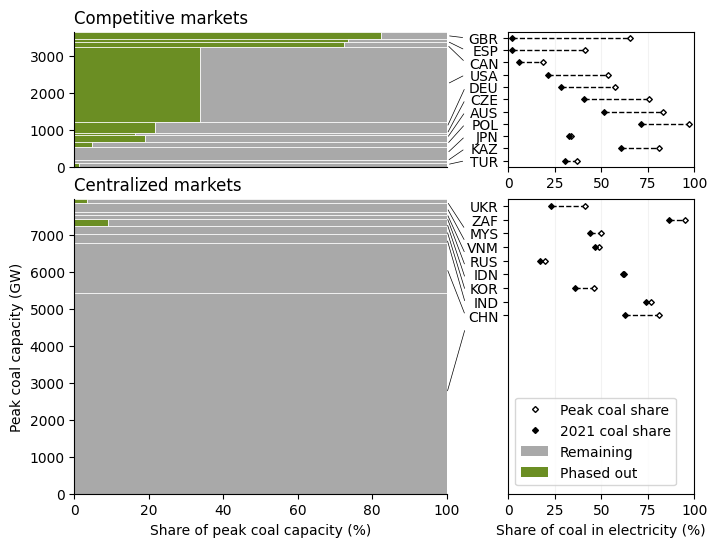

In [383]:
capmax_1 = select_data_1["plot_location"].max()+select_data_1[VAR_coal].iloc[-1]
capmax_0 = select_data_0["plot_location"].max()+select_data_0[VAR_coal].iloc[-1]
fig, axes = plt.subplots(2,2,figsize=(8,6),gridspec_kw={'height_ratios': [capmax_1/capmax_0,1],'width_ratios': [1,0.5]})
fig.subplots_adjust(wspace=0.22,hspace=0.15)
data_sets = [select_data_1,select_data_0]
capmax_sets = [capmax_1,capmax_0]
for row_ind in [0,1]:
    selected_data = data_sets[row_ind]
    this_ax = axes[row_ind,0]
    xPoint = selected_data["plot_location"]
    #select_data_1[["p_Remain","p_RetOnly","p_Transition"]].plot.bar(stacked=True, ax=ax[1,0],color=["darkgray","green","orange"],w=select_data_1["Max_Cap_GW"],legend=None)
    bar1 = this_ax.barh(xPoint, width= selected_data["Coal_Share_PhasedOut"], height=selected_data[VAR_coal], 
                   align="edge",color="olivedrab",edgecolor="white",linewidth=0.5)
    bar2 = this_ax.barh(xPoint, width= selected_data["Coal_Remain"], height=selected_data[VAR_coal], left=selected_data["Coal_Share_PhasedOut"],
                   align="edge",color="darkgray",edgecolor="white",linewidth=0.5)
    #bar2 = this_ax.barh(xPoint, width= selected_data["IND_Remain"], height=selected_data["Max_Cap_GW"], 
    #               left=selected_data[["IND_Perc_RetOnly_MW","IND_Perc_Transition_MW"]].sum(axis=1),
    #               align="edge",color="darkgray",edgecolor="white",linewidth=0.5)
    this_ax.set_xlim([0,100])
    ymax = capmax_sets[row_ind]
    this_ax.set_ylim([0,ymax])
    for ind in selected_data.index:
        if ind == selected_data.index[-1]:
            y_mean = selected_data.loc[ind,"plot_location"]+(selected_data[VAR_coal].iloc[-1])/2
        else:
            y_mean = (selected_data.loc[ind,"plot_location"]+selected_data.loc[ind+1,"plot_location"])/2
        yloc = ymax-(len(select_data_1)-ind-0.5)/len(select_data_1)*capmax_1
        #this_ax.text(x=101,y=y_mean,s=select_data_1.loc[ind,"Country Code"],fontsize=8,ha="left",va="center")
        this_ax.annotate(text="", xy=(100,y_mean),xytext=(105,yloc),arrowprops=dict(arrowstyle='-',color="black",lw=0.5))
    this_ax.spines['top'].set_visible(False)
    this_ax.spines['right'].set_visible(False)

    axes[row_ind,1].scatter(selected_data["Share_Coal_Gen_100"],selected_data["Country Code"],zorder=12,color="black",marker="D",edgecolor="black",s=8)
    axes[row_ind,1].scatter(selected_data["Max_Share_Coal_Gen_100"],selected_data["Country Code"],zorder=11,color="white",marker="D",edgecolor="black",s=8)
    axes[row_ind,1].hlines(selected_data["Country Code"],selected_data["Share_Coal_Gen_100"], selected_data["Max_Share_Coal_Gen_100"],ls = '--',color='black', linewidth=1, zorder=10)
    axes[row_ind,1].set_xlim([0,100])
    #axes[row_ind,1].spines['right'].set_visible(False)
    axes[row_ind,1].grid(axis='x', color='0.95')

#axes[0,1].spines['top'].set_visible(False)
#axes[1,1].spines['bottom'].set_visible(False)
axes[0,0].get_xaxis().set_visible(False)
#axes[0,1].get_xaxis().set_visible(False)
axes[1,1].set_ylim([-(capmax_0-capmax_1)/(capmax_1/len(select_data_1)),len(select_data_0)-0.5])
axes[0,0].set_title("Competitive markets",loc="left")
axes[1,0].set_title("Centralized markets",loc="left")
axes[1,0].set_ylabel("Peak coal capacity (GW)")
axes[1,0].set_xlabel("Share of peak coal capacity (%)")
axes[1,1].set_xlabel("Share of coal in electricity (%)")


legend_elements = [Line2D([0], [0], marker='D', color='black', label="Peak coal share",markerfacecolor='white',ls="None",markersize=3),
                   Line2D([0], [0], marker='D', color='black', label='2021 coal share',markerfacecolor='black', ls="None", markersize=3),
                   Patch(facecolor="darkgray", edgecolor=None, label="Remaining"),
                   Patch(facecolor="olivedrab", edgecolor=None, label="Phased out")]
axes[1,1].legend(handles=legend_elements, bbox_to_anchor=(0, 0.35),loc='upper left')
fig.savefig("top20peak_coal_capacity_area.png",dpi=600, bbox_inches='tight')

### coal generation phase out

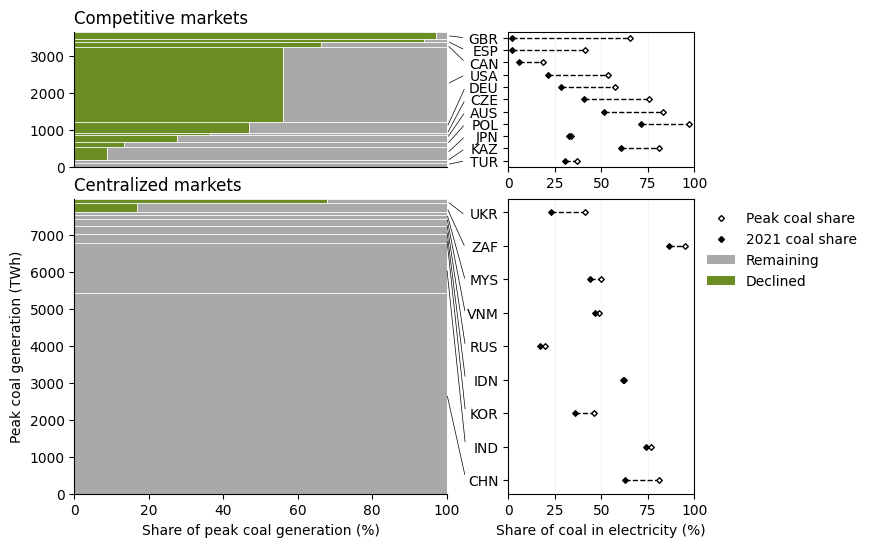

In [384]:
VAR_coal = "Max_Coal_Gen"
VAR_decline = "Share_Coal_GenDecline"

data_file_recent_select = data_file_recent_select.sort_values(by=VAR_coal,ascending=False)
top_data_select = data_file_recent_select.head(20)
select_data_1 = top_data_select.query("R_Choice==1").sort_values(by=VAR_decline).reset_index()
for i in select_data_1.index:
    sum_index = select_data_1.index[:i]
    select_data_1.loc[i,"plot_location"] = select_data_1.loc[sum_index,VAR_coal].sum()
    
select_data_0 = top_data_select.query("R_Choice==0").sort_values(by=VAR_decline).reset_index()
for i in select_data_0.index:
    sum_index = select_data_0.index[:i]
    select_data_0.loc[i,"plot_location"] = select_data_0.loc[sum_index,VAR_coal].sum()

capmax_1 = select_data_1["plot_location"].max()+select_data_1[VAR_coal].iloc[-1]
capmax_0 = select_data_0["plot_location"].max()+select_data_0[VAR_coal].iloc[-1]
fig, axes = plt.subplots(2,2,figsize=(8,6),gridspec_kw={'height_ratios': [capmax_1/capmax_0,1],'width_ratios': [1,0.5]})
fig.subplots_adjust(wspace=0.22,hspace=0.15)
data_sets = [select_data_1,select_data_0]
capmax_sets = [capmax_1,capmax_0]
for row_ind in [0,1]:
    selected_data = data_sets[row_ind]
    this_ax = axes[row_ind,0]
    xPoint = selected_data["plot_location"]
    #select_data_1[["p_Remain","p_RetOnly","p_Transition"]].plot.bar(stacked=True, ax=ax[1,0],color=["darkgray","green","orange"],w=select_data_1["Max_Cap_GW"],legend=None)
    bar1 = this_ax.barh(xPoint, width= selected_data[VAR_decline], height=selected_data[VAR_coal], 
                   align="edge",color="olivedrab",edgecolor="white",linewidth=0.5)
    bar2 = this_ax.barh(xPoint, width= selected_data["Share_Coal_GenRemain"], height=selected_data[VAR_coal], left=selected_data[VAR_decline],
                   align="edge",color="darkgray",edgecolor="white",linewidth=0.5)
    #bar2 = this_ax.barh(xPoint, width= selected_data["IND_Remain"], height=selected_data["Max_Cap_GW"], 
    #               left=selected_data[["IND_Perc_RetOnly_MW","IND_Perc_Transition_MW"]].sum(axis=1),
    #               align="edge",color="darkgray",edgecolor="white",linewidth=0.5)
    this_ax.set_xlim([0,100])
    ymax = capmax_sets[row_ind]
    this_ax.set_ylim([0,ymax])
    for ind in selected_data.index:
        if ind == selected_data.index[-1]:
            y_mean = selected_data.loc[ind,"plot_location"]+(selected_data[VAR_coal].iloc[-1])/2
        else:
            y_mean = (selected_data.loc[ind,"plot_location"]+selected_data.loc[ind+1,"plot_location"])/2
        yloc = (ind+0.5)/len(selected_data)*ymax
        #this_ax.text(x=101,y=y_mean,s=select_data_1.loc[ind,"Country Code"],fontsize=8,ha="left",va="center")
        this_ax.annotate(text="", xy=(100,y_mean),xytext=(105,yloc),arrowprops=dict(arrowstyle='-',color="black",lw=0.5))
    this_ax.spines['top'].set_visible(False)
    this_ax.spines['right'].set_visible(False)

    axes[row_ind,1].scatter(selected_data["Share_Coal_Gen_100"],selected_data["Country Code"],zorder=12,color="black",marker="D",edgecolor="black",s=8)
    axes[row_ind,1].scatter(selected_data["Max_Share_Coal_Gen_100"],selected_data["Country Code"],zorder=11,color="white",marker="D",edgecolor="black",s=8)
    axes[row_ind,1].hlines(selected_data["Country Code"],selected_data["Share_Coal_Gen_100"], selected_data["Max_Share_Coal_Gen_100"],ls = '--',color='black', linewidth=1, zorder=10)
    axes[row_ind,1].set_xlim([0,100])
    #axes[row_ind,1].spines['right'].set_visible(False)
    axes[row_ind,1].grid(axis='x', color='0.95')

#axes[0,1].spines['top'].set_visible(False)
#axes[1,1].spines['bottom'].set_visible(False)
axes[0,0].get_xaxis().set_visible(False)
#axes[0,1].get_xaxis().set_visible(False)
#axes[1,1].set_ylim([-(capmax_0-capmax_1)/(capmax_1/len(select_data_1)),len(select_data_0)-0.5])
axes[0,0].set_title("Competitive markets",loc="left")
axes[1,0].set_title("Centralized markets",loc="left")
axes[1,0].set_ylabel("Peak coal generation (TWh)")
axes[1,0].set_xlabel("Share of peak coal generation (%)")
axes[1,1].set_xlabel("Share of coal in electricity (%)")


legend_elements = [Line2D([0], [0], marker='D', color='black', label="Peak coal share",markerfacecolor='white',ls="None",markersize=3),
                   Line2D([0], [0], marker='D', color='black', label='2021 coal share',markerfacecolor='black', ls="None", markersize=3),
                   Patch(facecolor="darkgray", edgecolor=None, label="Remaining"),
                   Patch(facecolor="olivedrab", edgecolor=None, label="Declined")]
axes[1,1].legend(handles=legend_elements, bbox_to_anchor=(1,1),loc='upper left',frameon=False)
fig.savefig("top20peak_coal_generation_area.png",dpi=600, bbox_inches='tight')

### gas generation phase out

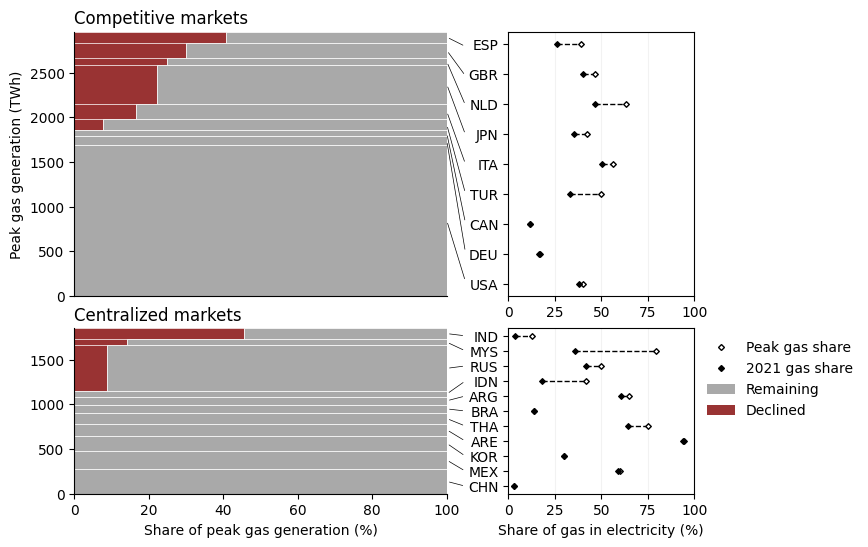

In [386]:
VAR_gas = "Max_Gas_Gen"#"Max_Coal_Gen"
data_file_recent_select = data_file_recent_select.sort_values(by=VAR_gas,ascending=False)
top_data_select = data_file_recent_select.head(20)
select_data_1 = top_data_select.query("R_Choice==1").sort_values(by="Share_Gas_GenDecline").reset_index()
for i in select_data_1.index:
    sum_index = select_data_1.index[:i]
    select_data_1.loc[i,"plot_location"] = select_data_1.loc[sum_index,VAR_gas].sum()
    
select_data_0 = top_data_select.query("R_Choice==0").sort_values(by="Share_Gas_GenDecline").reset_index()
for i in select_data_0.index:
    sum_index = select_data_0.index[:i]
    select_data_0.loc[i,"plot_location"] = select_data_0.loc[sum_index,VAR_gas].sum()

capmax_1 = select_data_1["plot_location"].max()+select_data_1[VAR_gas].iloc[-1]
capmax_0 = select_data_0["plot_location"].max()+select_data_0[VAR_gas].iloc[-1]
fig, axes = plt.subplots(2,2,figsize=(8,6),gridspec_kw={'height_ratios': [capmax_1/capmax_0,1],'width_ratios': [1,0.5]})
fig.subplots_adjust(wspace=0.22,hspace=0.15)
data_sets = [select_data_1,select_data_0]
capmax_sets = [capmax_1,capmax_0]
for row_ind in [0,1]:
    selected_data = data_sets[row_ind]
    this_ax = axes[row_ind,0]
    xPoint = selected_data["plot_location"]
    #select_data_1[["p_Remain","p_RetOnly","p_Transition"]].plot.bar(stacked=True, ax=ax[1,0],color=["darkgray","green","orange"],w=select_data_1["Max_Cap_GW"],legend=None)
    bar1 = this_ax.barh(xPoint, width= selected_data["Share_Gas_GenDecline"], height=selected_data[VAR_gas], 
                   align="edge",color="maroon",edgecolor="white",linewidth=0.5,alpha=0.8)
    bar2 = this_ax.barh(xPoint, width= selected_data["Share_Gas_GenRemain"], height=selected_data[VAR_gas], left=selected_data["Share_Gas_GenDecline"],
                   align="edge",color="darkgray",edgecolor="white",linewidth=0.5)
    #bar2 = this_ax.barh(xPoint, width= selected_data["IND_Remain"], height=selected_data["Max_Cap_GW"], 
    #               left=selected_data[["IND_Perc_RetOnly_MW","IND_Perc_Transition_MW"]].sum(axis=1),
    #               align="edge",color="darkgray",edgecolor="white",linewidth=0.5)
    this_ax.set_xlim([0,100])
    ymax = capmax_sets[row_ind]
    this_ax.set_ylim([0,ymax])
    for ind in selected_data.index:
        if ind == selected_data.index[-1]:
            y_mean = selected_data.loc[ind,"plot_location"]+(selected_data[VAR_gas].iloc[-1])/2
        else:
            y_mean = (selected_data.loc[ind,"plot_location"]+selected_data.loc[ind+1,"plot_location"])/2
        yloc = (ind+0.5)/len(selected_data)*ymax
        #this_ax.text(x=101,y=y_mean,s=select_data_1.loc[ind,"Country Code"],fontsize=8,ha="left",va="center")
        this_ax.annotate(text="", xy=(100,y_mean),xytext=(105,yloc),arrowprops=dict(arrowstyle='-',color="black",lw=0.5))
    this_ax.spines['top'].set_visible(False)
    this_ax.spines['right'].set_visible(False)

    axes[row_ind,1].scatter(selected_data["Share_Gas_Gen_100"],selected_data["Country Code"],zorder=12,color="black",marker="D",edgecolor="black",s=8)
    axes[row_ind,1].scatter(selected_data["Max_Share_Gas_Gen_100"],selected_data["Country Code"],zorder=11,color="white",marker="D",edgecolor="black",s=8)
    axes[row_ind,1].hlines(selected_data["Country Code"],selected_data["Share_Gas_Gen_100"], selected_data["Max_Share_Gas_Gen_100"],ls = '--',color='black', linewidth=1, zorder=10)
    axes[row_ind,1].set_xlim([0,100])
    #axes[row_ind,1].spines['right'].set_visible(False)
    axes[row_ind,1].grid(axis='x', color='0.95')

#axes[0,1].spines['top'].set_visible(False)
#axes[1,1].spines['bottom'].set_visible(False)
axes[0,0].get_xaxis().set_visible(False)
#axes[0,1].get_xaxis().set_visible(False)
#axes[1,1].set_ylim([-(capmax_0-capmax_1)/(capmax_1/len(select_data_1)),len(select_data_0)-0.5])
axes[0,0].set_title("Competitive markets",loc="left")
axes[1,0].set_title("Centralized markets",loc="left")
axes[0,0].set_ylabel("Peak gas generation (TWh)")
axes[1,0].set_xlabel("Share of peak gas generation (%)")
axes[1,1].set_xlabel("Share of gas in electricity (%)")


legend_elements = [Line2D([0], [0], marker='D', color='black', label="Peak gas share",markerfacecolor='white',ls="None",markersize=3),
                   Line2D([0], [0], marker='D', color='black', label='2021 gas share',markerfacecolor='black', ls="None", markersize=3),
                   Patch(facecolor="darkgray", edgecolor=None, label="Remaining"),
                   Patch(facecolor="maroon", edgecolor=None,alpha=0.8, label="Declined")]
axes[1,1].legend(handles=legend_elements, bbox_to_anchor=(1,1),loc='upper left',frameon=False)
fig.savefig("top20peak_gas_generation_area.png",dpi=600, bbox_inches='tight')